## Exploring Audio Features

In [1]:
import sys
import os
import numpy as np
import pandas as pd
sys.path.insert(0, '../../')
from library.notebook_api.data_loader import  ModelDataLoader,CombinedDataLoader
from library.source_data.feature_extractor import AudioFeatureExtractor
from library.source_data.parallel_processor import AudioParallelProcessor
from configuration import PROJECT_ABSOLUTE_PATH,MODEL_INPUT_DATA_PATH
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import base64
from io import BytesIO


In [2]:
#instantate data_loader and the dataframes it makes available 
in_scope_labels = ['rock', 'electronic', 'hiphop', 'classical', 'jazz','country']

data_loader = CombinedDataLoader('large', in_scope_labels)
df = data_loader.df
df_files_available = data_loader.df_files_available
df_genres_available = data_loader.df_genres_available
df_filtered = data_loader.df_filtered
df_filtered_in_scope = df_filtered#[df_filtered['label'].apply(lambda label: True if label in in_scope_labels else False)]

tracks in meta 29701
tracks with files available in project_data_path:  29701
tracks with top level genres available 29701
tracks with genres and files (df_filtered) 29701


In [4]:
#unsupervised and supervised results 
clusters = pd.read_csv(MODEL_INPUT_DATA_PATH+'clusters.csv')[['audio_path' , 'label', '0']]
predicted_genres = pd.read_csv(MODEL_INPUT_DATA_PATH+'predicted_prob.csv')
combined_df = predicted_genres.merge(clusters, on='audio_path')
combined_df.drop(columns=['index','label'], inplace=True)

In [187]:
len(predicted_genres), len(combined_df)

(5870, 5870)

In [ ]:
SAMPLE_RATE  = 22500
SECONDS = 6
#SECONDS = 25

source_data_and_model_output_df = pd.merge(df_filtered_in_scope, combined_df, on='audio_path')
df_filtered_in_scope_sample = data_loader.get_data_sampled_by_label(1,source_data_and_model_output_df)
audio = AudioFeatureExtractor(df_filtered_in_scope_sample)
audio.add_audio_data_to_df(SAMPLE_RATE,0,SAMPLE_RATE*SECONDS)
audio.add_numerical_features_to_df()
audio.add_mfcc_to_df()
audio.add_log_melspectrogram_to_df()

/Users/murphybre/Desktop/UMichigan/Fall2024/siads699_capstone/music_modeling_capstone/notebooks/exploratory/../../library/source_data/feature_extractor.py:136: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)[0]


In [6]:
audio.df.head()

track_id dataset                                         audio_path  \
63     001127     fma  /project_data_source/free_music_archive/fma_la...   
662    028894     fma  /project_data_source/free_music_archive/fma_la...   
880    040513     fma  /project_data_source/free_music_archive/fma_la...   
1990   120855     fma  /project_data_source/free_music_archive/fma_la...   
1742   086412     fma  /project_data_source/free_music_archive/fma_la...   

           label fma_genre_top     fma_genres       fma_genres_all  \
63          rock          Rock           [12]                 [12]   
662   electronic    Electronic     [286, 400]  [400, 182, 286, 15]   
880       hiphop       Hip-Hop           [21]                 [21]   
1990   classical     Classical  [5, 441, 443]        [441, 443, 5]   
1742        jazz          Jazz        [4, 97]              [97, 4]   

      file_available      rock    electronic  ...   country     y_pred  \
63               1.0  0.000119  2.005520e-04  ...  0.600688       rock   
662              1.0  0.000006  7.686750e-05  ...  0.044422     hiphop   
880              1.0  0.000043  3.039573e-05  ...  0.191450     hiphop   
1990             1.0  0.983493  3.226437e-07  ...  0.000828  classical   
1742             1.0  0.099028  4.967352e-05  ...  0.781974       rock   

          y_true  0                            audio_and_sampling_rate  \
63          rock  2  ([3.7252903e-08, 3.7252903e-08, 4.0978193e-08,...   
662   electronic  2  ([-0.088704854, -0.13106394, -0.11090556, -0.1...   
880       hiphop  2  ([7.450581e-09, 1.4901161e-08, 0.0, -1.4901161...   
1990   classical  0  ([-1.8626451e-09, -4.656613e-09, -3.259629e-09...   
1742        jazz  0  ([-8.381903e-09, -7.450581e-09, 9.313226e-10, ...   

                                                  audio  sampling_rate  \
63    [3.7252903e-08, 3.7252903e-08, 4.0978193e-08, ...          22500   
662   [-0.088704854, -0.13106394, -0.11090556, -0.12...          22500   
880   [7.450581e-09, 1.4901161e-08, 0.0, -1.4901161e...          22500   
1990  [-1.8626451e-09, -4.656613e-09, -3.259629e-09,...          22500   
1742  [-8.381903e-09, -7.450581e-09, 9.313226e-10, -...          22500   

                                               features  \
63    [2106.35, -3.2184005, 1.2785745, 2108.305, 407...   
662   [2335.2705, 1.0682802, 4.2186913, 2278.2214, 4...   
880   [2458.7268, 0.104751416, -1.4606705, 2738.6743...   
1990  [1574.1023, -0.77434635, -0.1352272, 1717.4397...   
1742  [821.88214, -0.054841083, 0.06535842, 1106.148...   

                                                   mfcc  \
63    [[-195.2012, -47.06794, 2.088341, 15.839012, 6...   
662   [[-175.51366, -144.85197, -156.89462, -191.511...   
880   [[-220.9502, -81.366844, -50.077427, -62.96493...   
1990  [[-468.24387, -344.062, -316.4295, -313.65115,...   
1742  [[-506.33264, -403.7074, -378.8455, -383.3719,...   

                                     log_melspectrogram  
63    [[-53.162598, -44.069565, -45.57396, -44.59025...  
662   [[-20.044222, -26.081865, -43.57857, -44.92928...  
880   [[-27.564075, -14.862198, -11.668484, -13.4279...  
1990  [[-60.182762, -45.96134, -39.298553, -31.64517...  
1742  [[-36.389286, -30.403269, -34.65173, -52.08885...  

[5 rows x 23 columns]

In [7]:
def get_log_mel_spectrogram_image_base_64(log_mel_s_):
    fig, ax = plt.subplots()
    spectro = librosa.display.specshow(log_mel_s_,x_axis='time', y_axis='mel', fmax=8000)
    fig.colorbar(spectro, ax=ax)
    tmpfile = BytesIO()
    fig.savefig(tmpfile, format='png')
    encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')
    plt.close()
    return encoded

def get_image_html(encoded_image):

    return f'''<img src="data:image/png;base64,{encoded_image}" alt="alt image width="100" height="100">'''

def get_audio_player_html(audio_path):
    audio_html = f'''<audio controls autoplay><source src="{audio_path}" type="audio/mpeg">Your browser does not support the audio element.</audio>'''
    return audio_html

def get_log_mel_spectrogram_html_image_array(log_melspectroram_array):
    plt.ioff()
    html_images = []
    for lm in log_melspectroram_array:
        encoded = get_log_mel_spectrogram_image_base_64(lm)
        html = get_image_html(encoded)
        html_images.append(html)
    return html_images

def get_audio_player_html_array(audio_paths):
    html_players = []
    for path in audio_paths:
        html_players.append(get_audio_player_html(path))
    return html_players


def get_table_rows(audio_browser_table_data):
    table_data_list = list(audio_browser_table_data.items())
    num_columns = len(table_data_list)
    num_rows = len(table_data_list[0][1])
    #print('num rows: ', num_rows)
    all_rows = ''
    for row_index in list(range(0,num_rows)):
       # print('row: ', row_index)
        current_row_html = "<tr>\n"
        for column_index in list(range(0,num_columns)):
            #print('column: ', column_index)
            current_row_html += "<td>" + table_data_list[column_index][1][row_index]+"</td>"
            current_row_html += "\n"
        current_row_html += "</tr>\n"
            
        all_rows += current_row_html 
    return all_rows  

In [24]:
audio_browser_table_data = {
'Audio Player': get_audio_player_html_array(audio.df.audio_path.apply(lambda audio_path: PROJECT_ABSOLUTE_PATH+ audio_path)),
'Log Melspectrogram': get_log_mel_spectrogram_html_image_array(list(audio.df.log_melspectrogram)),
'Feature: Tempo': (list(audio.df.features.apply(lambda feature: str(int(feature[10]))))),
'Actual Genre': list(audio.df.label),
'Explainable Predicted Genre': list(audio.df.y_pred)
}

In [25]:
audio_browser_header = '''
<html>
<head>
    <title>Table with Images</title>
    <style>
        table {{
            margin: auto;
        }}
    </style>
</head>

<body>
    <table border="1">
'''

table_headers = "<tr>\n" + ''.join(f'<th>{key}</th>\n' for key in list(audio_browser_table_data.keys())) +"</tr>\n"
audio_browser_footer = '''
    </table>
</body>
</html>
'''

table_rows = get_table_rows(audio_browser_table_data)

table_html = audio_browser_header+table_headers+table_rows+audio_browser_footer


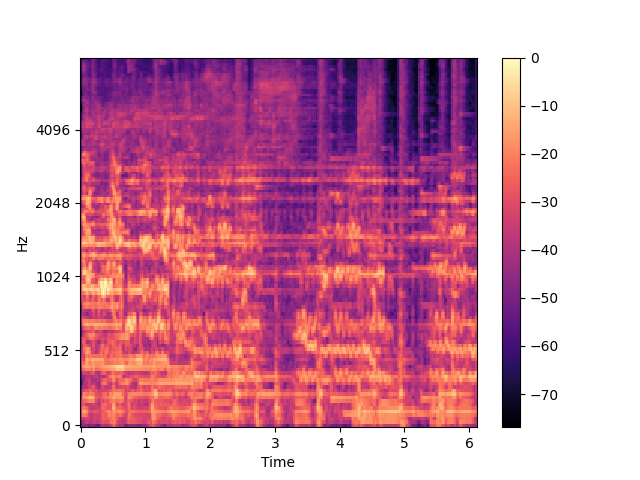
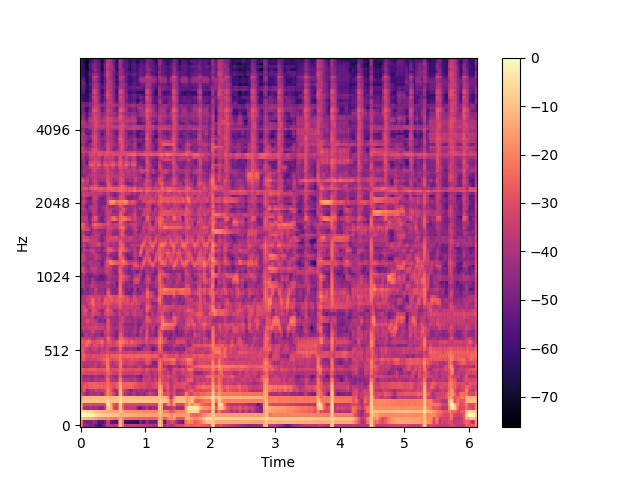
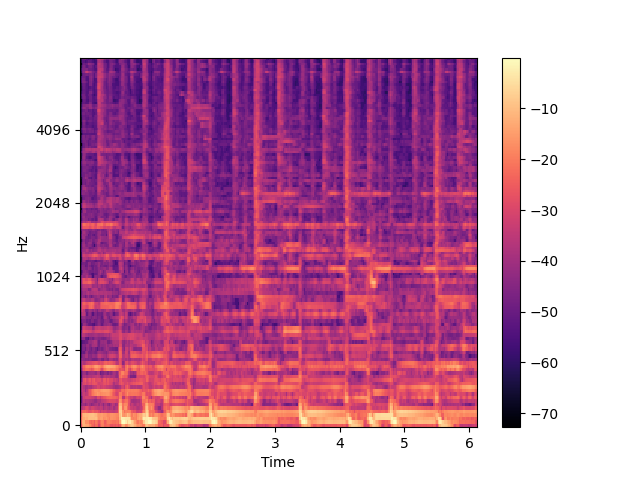
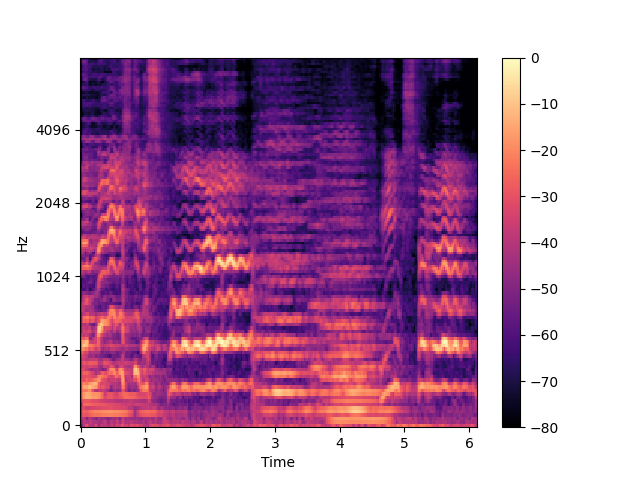
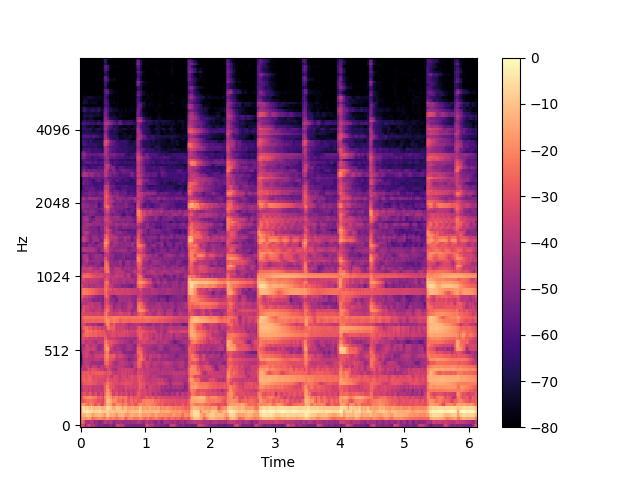
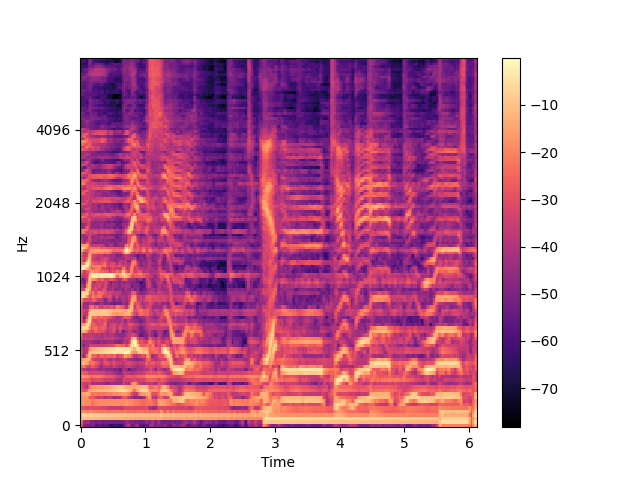

In [26]:
ipd.display(ipd.HTML(table_html))

In [27]:
#print(table_html)

Showing Track:  118741 label is:  rock
Showing Track:  082076 label is:  electronic
Showing Track:  032957 label is:  hiphop
Showing Track:  050931 label is:  classical
Showing Track:  051935 label is:  jazz
Showing Track:  country.00034.wav label is:  country


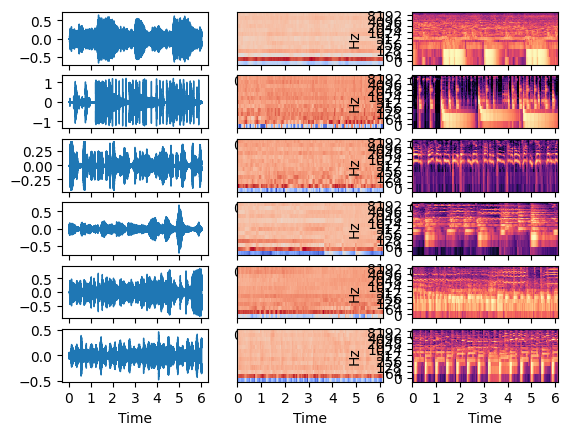

In [40]:
#to do: see if there is a way to filter out bad files 
#035394 - electronic? but more towards end 
#035453 - is jazz but doesn't sound like it 
#how to account fo music with differnet parts (predict each part and average the scores?)
audio.explore_features(12)

In [42]:
row_num = 0
track_id_ =audio.df['track_id'].iloc[row_num]
mfccs_ = audio.df['mfcc'].iloc[row_num]#[0: int(len(mfccs)/4)]
log_s_ =audio.df['log_melspectrogram'].iloc[row_num]
audio_ = audio.df['audio'].iloc[row_num]
sr_ = audio.df['sampling_rate'].iloc[row_num]
label_ = audio.df['label'].iloc[row_num]
print(label_)

rock


In [43]:
len(audio_), mfccs_.shape, log_s_.shape

(135000, (13, 264), (128, 264))

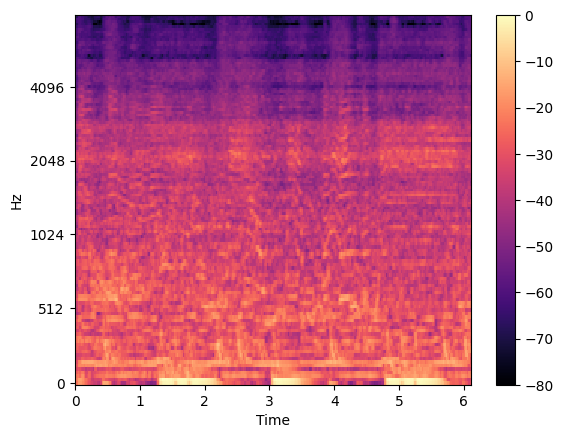

In [55]:
fig, ax = plt.subplots()
spectro = librosa.display.specshow(log_s_,                                     x_axis='time', y_axis='mel', fmax=8000)
fig.colorbar(spectro, ax=ax)

In [53]:
tmpfile = BytesIO()
fig.savefig(tmpfile, format='png')
encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')

html = 'Some html head' + '<img src=\'data:image/png;base64,{}\'>'.format(encoded) + 'Some more html'

"Some html headSome more html"
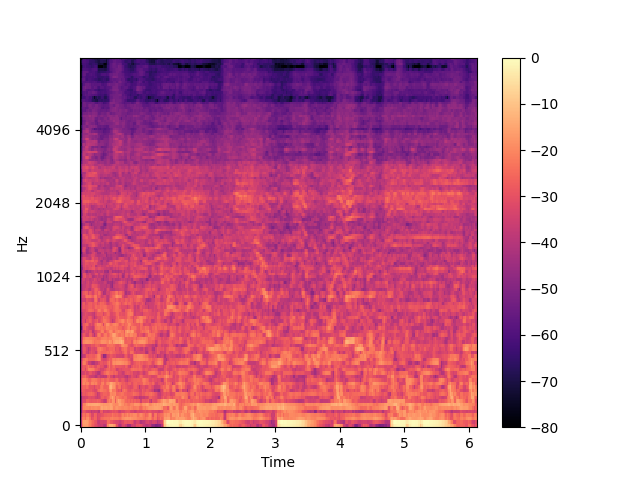

In [54]:
html

In [48]:
dir(spectro)[-45:]

['set_color',
 'set_dashes',
 'set_ec',
 'set_edgecolor',
 'set_edgecolors',
 'set_facecolor',
 'set_facecolors',
 'set_fc',
 'set_figure',
 'set_gid',
 'set_hatch',
 'set_in_layout',
 'set_joinstyle',
 'set_label',
 'set_linestyle',
 'set_linestyles',
 'set_linewidth',
 'set_linewidths',
 'set_ls',
 'set_lw',
 'set_mouseover',
 'set_norm',
 'set_offset_transform',
 'set_offsets',
 'set_path_effects',
 'set_paths',
 'set_picker',
 'set_pickradius',
 'set_rasterized',
 'set_sketch_params',
 'set_snap',
 'set_transOffset',
 'set_transform',
 'set_url',
 'set_urls',
 'set_visible',
 'set_zorder',
 'stale',
 'stale_callback',
 'sticky_edges',
 'to_rgba',
 'update',
 'update_from',
 'update_scalarmappable',
 'zorder']

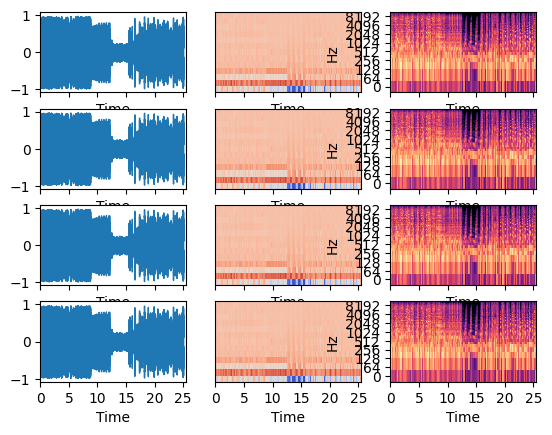

In [14]:
fig, ax = plt.subplots(nrows=4, ncols=3, sharex=True)
for i in range(4):
   # load wave #i
   librosa.display.waveshow(audio_, sr=sr_, ax=ax[i, 0])  # put wave in row i, column 0
   librosa.display.specshow(mfccs_, x_axis='time', ax=ax[i, 1]) # mfcc in row i, column 1
   librosa.display.specshow(log_s_, x_axis='time', y_axis='log', ax=ax[i, 2])  # spectrogram in row i, column 2


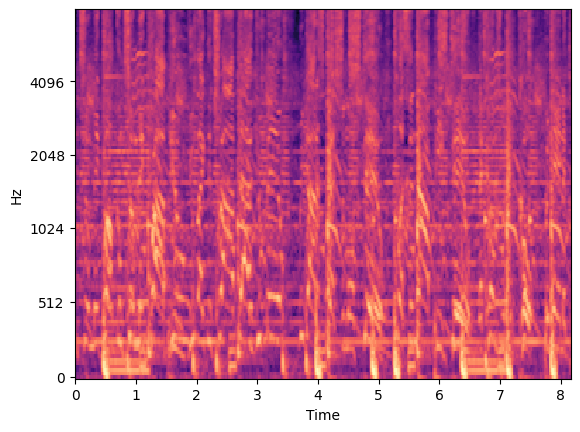

In [26]:
ipd.display(ipd.Audio(audio_, rate=sr_),
            librosa.display.waveshow(audio_, sr=sr_),
                    
            )
librosa.display.specshow(log_s_,
                                        x_axis='time', y_axis='mel', fmax=8000)

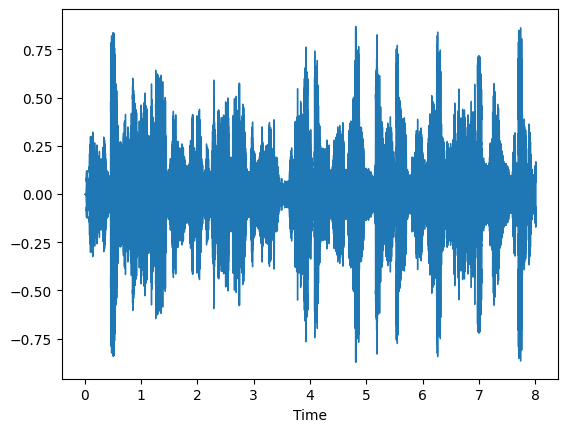

In [24]:
ipd.display(ipd.Audio(audio_, rate=sr_),
            librosa.display.waveshow(audio_, sr=sr_)                 
            )

In [19]:
ipd.Audio(audio_, rate=sr_)

In [10]:
len(mfccs_)

13

In [8]:
mfccs_.shape, log_s_.shape

((13, 352), (128, 352))

[Text(0.5, 1.0, 'MFCC')]

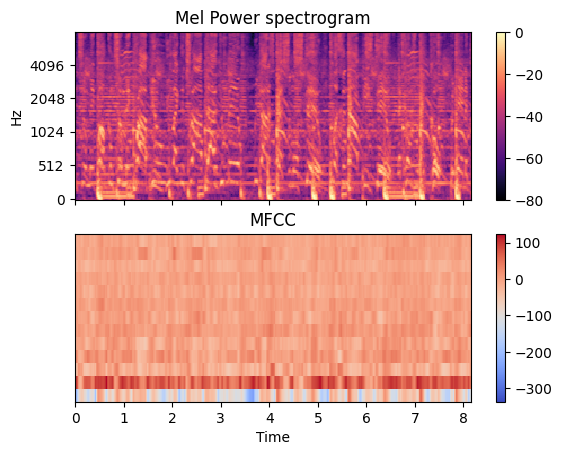

In [20]:
fig, ax = plt.subplots(nrows=2, sharex=True)
#'''
img = librosa.display.specshow(log_s_,
                               x_axis='time', y_axis='mel', fmax=8000,
                               ax=ax[0])
        
fig.colorbar(img, ax=[ax[0]])
#'''
ax[0].set(title='Mel Power spectrogram')
ax[0].label_outer()
img = librosa.display.specshow(mfccs_, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC')